# Sephora Dataset Analysis

In [ ]:
import os
import sys

# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")

    # Clone repository if in Colab
    if not os.path.exists('/content/math_120_final_project/'):
        !git clone https://github.com/lizlemus0811/math_120_final_project.git

    # Change to project directory
    os.chdir('/content/math_120_final_project')

except ImportError:
    IN_COLAB = False
    print("Running locally")

# Add src directory to Python path
if 'src' not in sys.path:
    sys.path.append('src')

print(f"Current working directory: {os.getcwd()}")

Running in Google Colab
Cloning into 'math_120_final_project'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 19 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 1.33 MiB | 14.77 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Current working directory: /content/math_120_final_project


## Project Overview
This project explores consumer sentiment regarding inclusivity in makeup brands using product reviews. I will compare sentiment between brands known for being inclusive and those that have faced criticism for limited shade ranges or accessibility. The analysis includes basic review exploration, sentiment scoring with VADER (SID), and visualization of trends across brands. The goal is to understand how consumers perceive inclusivity in the beauty industry and identify patterns in positive and negative feedback.

## 1. Setup and Data Loading

Disclaimer: Only run the following code cells if you have downloaded the raw data from Kaggle

###  Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###  Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Define Data Path

In [4]:
path="/content/drive/MyDrive/data"

###  Load Product Information

In [5]:

product_info= pd.read_csv(path +"/product_info.csv")
product_info.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


###  Load and Concatenate Review Data

I combined all reviews into one big csv, to analyze all at once.

In [6]:

review1= pd.read_csv(path +"/reviews_0-250.csv")
review2= pd.read_csv(path +"/reviews_250-500.csv")
review3= pd.read_csv(path +"/reviews_500-750.csv")

all_reviews= pd.concat([review1, review2, review3], ignore_index=True)

/tmp/ipython-input-1712036285.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  review1= pd.read_csv(path +"/reviews_0-250.csv")


###  Inspect All Reviews

In [7]:
all_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


## 2. Data Preprocessing

### Define Target Brands

We will be focusing on the sentiment analysis of the following brands. This also helps exclude other nonmakeup brands since the data set includes reviews for skincare and haircare as well.

In [8]:
#Create subset of brands we want to analyze
brands_subset = [
    'Fenty Beauty by Rihanna', 'MAC', 'NARS', 'Huda Beauty', 'NYX Professional Makeup',
    'Glossier', 'Cover FX', 'Pat McGrath Labs', 'tarte', 'Rare Beauty by Selena Gomez',
    'Maybelline', 'L’Oréal', 'Revlon', 'Estée Lauder', 'Clinique',
    'Bobbi Brown', 'Too Faced', 'Urban Decay', 'Smashbox', 'e.l.f.'
]

##  Filter Reviews by Brands

In [9]:
#create a filtered_reviews data frame that only includes the reviews of the brands in our given list
filtered_reviews = all_reviews[all_reviews['brand_name'].isin(brands_subset)].copy()

###  Inspect Filtered Reviews

In [10]:
filtered_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
192137,192137,8409505487,5,1.0,1.00,1,0,1,2023-03-15,I usually use make up forever base and then sw...,NaN,lightMedium,brown,combination,black,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0
192138,192138,24758468400,5,1.0,1.00,6,0,6,2023-03-09,I’ve been using this gem for over a month. I l...,Skincare and makeup lovers this is for you,NaN,hazel,normal,NaN,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0
192139,192139,7539923825,5,1.0,0.80,5,1,4,2023-03-01,This is great! My skin has never been more glo...,NaN,fair,hazel,oily,NaN,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0
192140,192140,2852499722,5,1.0,0.75,4,1,3,2023-02-28,This product is a go to for makeup lovers for ...,A great makeup moisturizer/primer,fairLight,blue,dry,brown,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0
192141,192141,7558126609,5,1.0,NaN,0,0,0,2023-02-28,Love love love!! This primer keeps my makeup o...,love this primer!,light,blue,oily,blonde,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0


In [11]:
#create cvs for filtered reviews
filtered_reviews.to_csv("filtered_reviews.csv", index=False)

Disclaimer: If you only downlowded the cleaned data file from Github then you can start running the notebook here

## 3. Exploratory Data Analysis (EDA)

###  Analyze Brand Review Counts

In [25]:
#check to see how many reviews we have for each brand
brand_counts = filtered_reviews['brand_name'].value_counts()
print(brand_counts.head(10))

brand_name
Estée Lauder    16149
tarte            7677
Bobbi Brown      3845
Name: count, dtype: int64


Here we can see that the data has reviews from 3 brands: Tarte, Estee Lauder, and Bobbi brown.

###  Visualize Top 10 Brands by Review Count

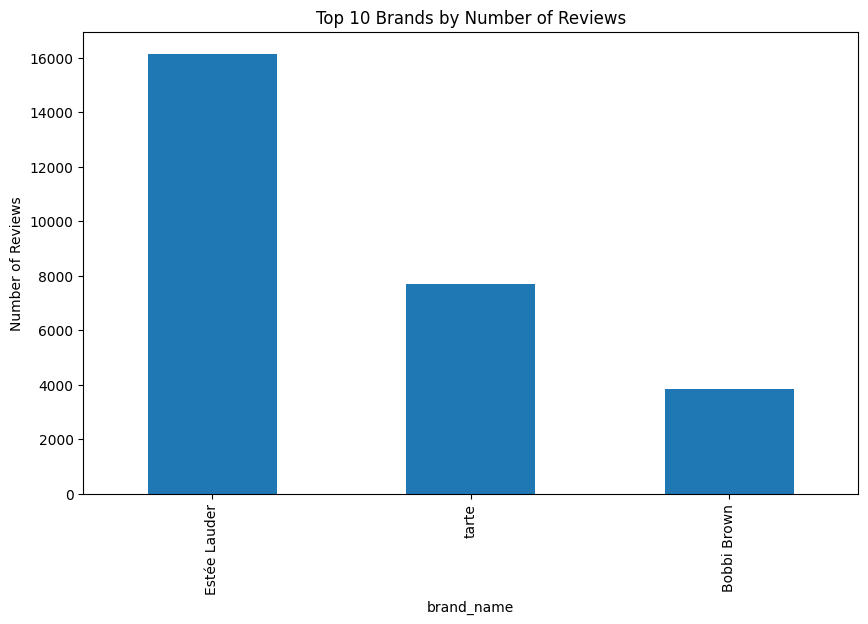

In [26]:
import matplotlib.pyplot as plt

brand_counts.head(10).plot(kind='bar', figsize=(10,6), title='Top 10 Brands by Number of Reviews')
plt.ylabel('Number of Reviews')
plt.show()

Here is a visualization to look at the distribution of the number of reviews per brand.

### Analyze Review Lengths

In [69]:
# looking at the length of reviews in filtered_reviews
filtered_reviews['review_length'] = filtered_reviews['review_text'].apply(lambda x: len(str(x).split()))
filtered_reviews['review_length'].describe()

,review_length
count,27671.000000
mean,58.760869
std,39.505159
min,1.000000
25%,33.000000
50%,49.000000
75%,74.000000
max,466.000000


###  Visualize Review Length Distribution

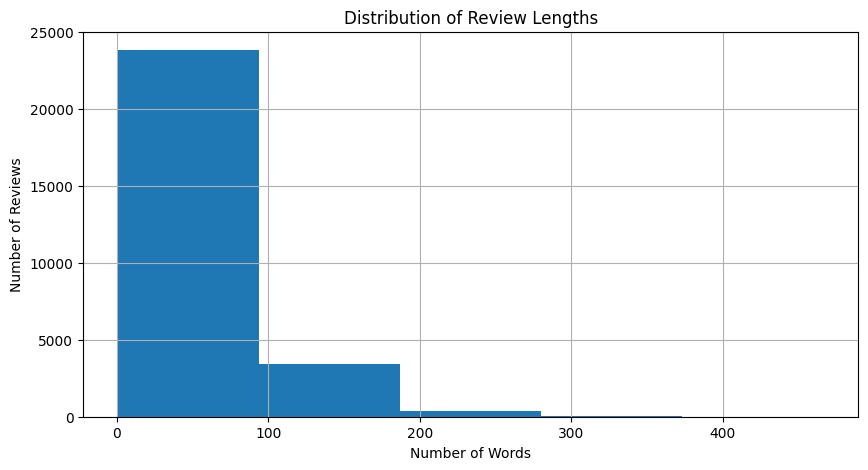

In [70]:
filtered_reviews['review_length'].hist(bins=5, figsize=(10,5))
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.show()

Here we can see that most reviews are under 100 words.

## 4. Sentiment Analysis

###  Install and Import NLTK

In [16]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install nltk

In [17]:
# import nltk package
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


### Initialize Sentiment Analyzer and Test

In [18]:
# instantiate a sentiment classifier
sid = SentimentIntensityAnalyzer()

test = "I hated this foundation, it broke out my face."

print(test)
sid.polarity_scores(test)

I hated this foundation, it broke out my face.


{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.7906}

### Select Relevant Columns for Sentiment Analysis

In [19]:
#looking only at the brand, product name and reviews for the sentiment analysis
filtered_reviews[['product_name', 'brand_name','review_text']]

,product_name,brand_name,review_text
192137,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,I usually use make up forever base and then sw...
192138,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,I’ve been using this gem for over a month. I l...
192139,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,This is great! My skin has never been more glo...
192140,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,This product is a go to for makeup lovers for ...
192141,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,Love love love!! This primer keeps my makeup o...
...,...,...,...
908680,Hydrating Eye Cream,Bobbi Brown,I had high hopes for this eye cream but it bur...
908681,Hydrating Eye Cream,Bobbi Brown,I’ve ordered Bobbi Brown skincare products for...
908682,Hydrating Eye Cream,Bobbi Brown,I have been using this eye cream for years and...
908683,Hydrating Eye Cream,Bobbi Brown,The lady at the counter told me I have extreme...


###  Calculate Sentiment Scores

In [20]:
#Calculating sentiment for each review text in filtered reviews and adding to data frame
filtered_reviews['sentiment_score'] = filtered_reviews['review_text'].astype(str).apply(lambda x: sid.polarity_scores(x)['compound'])

###  Label Sentiment

In [21]:
#labeling sentiment neg, pos, or neutral
def label_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'
# adding sentiment label collumn to data frame
filtered_reviews['sentiment_label'] = filtered_reviews['sentiment_score'].apply(label_sentiment)

###  Display Filtered Reviews with Sentiment

In [22]:
filtered_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,...,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd,sentiment_score,sentiment_label
192137,192137,8409505487,5,1.0,1.00,1,0,1,2023-03-15,I usually use make up forever base and then sw...,...,lightMedium,brown,combination,black,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0,0.4215,positive
192138,192138,24758468400,5,1.0,1.00,6,0,6,2023-03-09,I’ve been using this gem for over a month. I l...,...,NaN,hazel,normal,NaN,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0,0.8685,positive
192139,192139,7539923825,5,1.0,0.80,5,1,4,2023-03-01,This is great! My skin has never been more glo...,...,fair,hazel,oily,NaN,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0,0.9608,positive
192140,192140,2852499722,5,1.0,0.75,4,1,3,2023-02-28,This product is a go to for makeup lovers for ...,...,fairLight,blue,dry,brown,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0,0.9457,positive
192141,192141,7558126609,5,1.0,NaN,0,0,0,2023-02-28,Love love love!! This primer keeps my makeup o...,...,light,blue,oily,blonde,P270594,Vitamin Enriched Face Base Priming Moisturizer,Bobbi Brown,66.0,0.9744,positive


In [40]:
top_3_brands = ['Estée Lauder', 'tarte', 'Bobbi Brown']
top3_reviews = filtered_reviews[filtered_reviews['brand_name'].isin(top_3_brands)].copy()


In [47]:
#avg sentiment score by brand
top3_reviews.groupby('brand_name')['sentiment_score'].mean()

,sentiment_score
brand_name,
Bobbi Brown,0.786120
Estée Lauder,0.718846
tarte,0.650692


Here we can see that Bobbi Brown has the highest positive sentiment and all 3 brands have a positive sentiment score on average.

In [61]:
avg_sentiment = top3_reviews.groupby('brand_name')['sentiment_score'].mean()

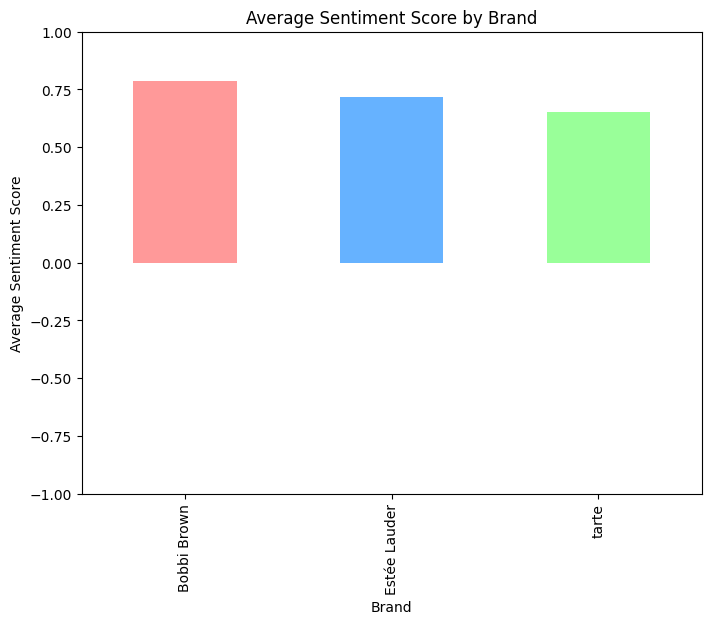

In [62]:
#creating a bargraph showing the range of sentiment score per brand
avg_sentiment.plot(kind='bar', color=['#FF9999','#66B2FF','#99FF99'], figsize=(8,6))
plt.title('Average Sentiment Score by Brand')
plt.ylabel('Average Sentiment Score')
plt.xlabel('Brand')
plt.ylim(-1, 1)  # because sentiment scores range from -1 to 1
plt.show()


/tmp/ipython-input-2002120712.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='brand_name', y='sentiment_score', data=top3_reviews, palette='Pastel1')


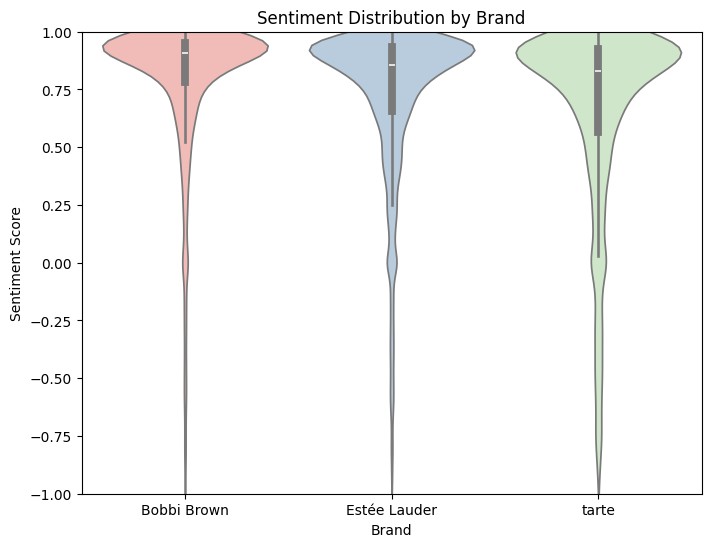

In [63]:
#violinplot to show the distribution of the brand sentiment scores
import seaborn as sns

plt.figure(figsize=(8,6))
sns.violinplot(x='brand_name', y='sentiment_score', data=top3_reviews, palette='Pastel1')
plt.title('Sentiment Distribution by Brand')
plt.ylabel('Sentiment Score')
plt.xlabel('Brand')
plt.ylim(-1, 1)
plt.show()


Here we can see that Tarte has the most reviews with negative sentiment out of the three. I kind of expected this based off my knowledge of tartes scandals about not having a good shade range back in 2018.

In [75]:
#Here I am choosing some keywords that I often see in positive or negative reviews about inclusivity
inclusivity_keywords = [
    'shade', 'shades', 'range', 'dark', 'light',
    'match', 'undertone', 'inclusive', 'diverse','skintone'
]
#Check if reviews contain any of the given reviews
filtered_reviews['mentions_inclusivity'] = (
    filtered_reviews['review_text']
    .str.lower()
    .str.contains('|'.join(inclusivity_keywords), na=False)
)


In [76]:
# Create a table that shows if words are mentioned (True or False) given that how many reviews fall into each sentiment label category
filtered_reviews.groupby(
    ['mentions_inclusivity', 'sentiment_label']
).size()


mentions_inclusivity  sentiment_label
False                 negative            1325
                      neutral              557
                      positive           20723
True                  negative             211
                      neutral              106
                      positive            4749
dtype: int64

Here we can see that the majority of the reviews do not mention any of the keywords we were looking for. The reviews that did mention the words were mainly positive, this correlates with the overall positive sentiment we have seen across the brands which indictates that the brands are likely being inclusive.

In [77]:
#look at the avg sentiment score for revoews that mention those words and those that don't
filtered_reviews.groupby('mentions_inclusivity')['sentiment_score'].mean()


,sentiment_score
mentions_inclusivity,
False,0.700277
True,0.749484


In both cases we see a positive sentiment on avg.

In [78]:
#Now lets look only at reviews with a negative sentiment and see what proportion of them mention the inclusivoty terms
negative_reviews = filtered_reviews[
    filtered_reviews['sentiment_label'] == 'negative'
]

negative_reviews['mentions_inclusivity'].value_counts(normalize=True)


,proportion
mentions_inclusivity,
False,0.86263
True,0.13737


Very few negative reviews have those keywords, whoch could indicate the brand is being inclusive or maybe our sample size is too small to conduct a proper analysis.

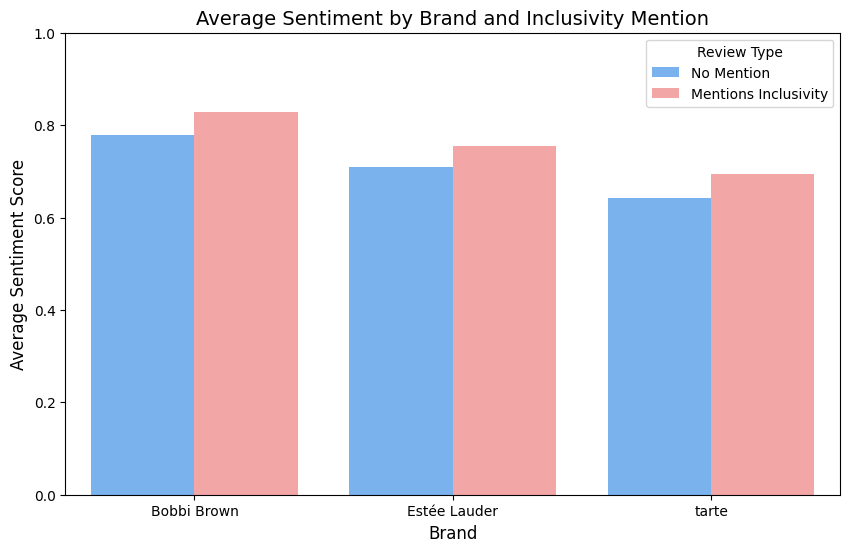

In [79]:

# Calculate average sentiment by brand and inclusivity mention
avg_sentiment = top3_reviews.groupby(['brand_name', 'mentions_inclusivity'])['sentiment_score'].mean().reset_index()

# Map True/False to readable labels
avg_sentiment['Inclusivity Mention'] = avg_sentiment['mentions_inclusivity'].map({True: 'Mentions Inclusivity', False: 'No Mention'})

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(
    x='brand_name',
    y='sentiment_score',
    hue='Inclusivity Mention',
    data=avg_sentiment,
    palette=['#66B2FF', '#FF9999']
)

# Add labels and title
plt.title('Average Sentiment by Brand and Inclusivity Mention', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Sentiment Score', fontsize=12)
plt.ylim(0, 1)  # Sentiment scores are between -1 and 1, but all your values are positive
plt.legend(title='Review Type')
plt.show()

Here we see a comparison side by side for all three brands. We can see that Bobbi Brown has the highest sentiment scores all around for reviews with and without the keywords.

 ## Conclusion

 Overall, the sentiment analysis on Bobbi Brown, Estee Lauder, and Tarte resulted in mainly positive. When we looked at reviews that mentioned the inclusivity key words we saw that they tend to be a bit more positive than the reviews that don't include those key words. This is a good indicator that the brands have done a great job at being inclusive in terms of shade range and accessibility for a variety of undertones and skin colors, which is a common subject when determining inclusivity in makeup brands.